DL Face Mask Detection using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os



In [4]:
data_path='D:\\Uvindya\\personal\\DS\\FaceMask'

Data PreProcessing

In [6]:
train_datagen=ImageDataGenerator(rescale=1.0/255, 
                             shear_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True,
                            validation_split=0.2)

Loading Training data

In [9]:
training_data=train_datagen.flow_from_directory(
    data_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training')




Found 6043 images belonging to 2 classes.


Loading Validation Set

In [12]:
Validating_data=train_datagen.flow_from_directory(
    data_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 1510 images belonging to 2 classes.


Model Training

First Layer
Conv2D(32,(3,3)
convolutinal layer with 32 filters each with size 3*3
edges,corners detection

relu:Non-linear
learn complex patterns

input_shape(150,150,3)
150:height
150:width
3:RGB

MaxPooling Layer(2,2)
Reduce spatial dimentions
Focus on most important


Flattern Layer
2D feture maps->>1D vector
pass to fully connected Layer

Fully Connected Layer
consist of 512 neurons where each neuron is connected to every other neuron from the previous layer.

Output Layer
Dense(1, activation='sigmoid')

In binary Classification layerhas single neuron(mask/no mask)
Sigmoid:Since Output is Between 0 and 1

Compiling
adam:Optimization algorithm that will update weights of model to minimize the loss
loss='binary_crossentropy':measure how well model performing
metrics=['accuracy']: Accuracy is used to evaluate the model’s performance during training and testing.
 


In [13]:
model = tf.keras.models.Sequential([
    # First Convolutional Layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Second Convolutional Layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Third Convolutional Layer
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # Flatten and fully connected layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    
    # Output layer for binary classification
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


C:\Users\UVINDYA\.conda\envs\SLIIT\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
#model.compile(Liss='binary_crossentropy',
            #optimizer=RMSprop(Learning_rate=0.001),
            #metrics=['accuracy'])

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])

Training Model

In [24]:
history = model.fit(
    training_data,
    validation_data=Validating_data,
    steps_per_epoch=8,  # Adjust epochs as needed
    epochs=10)



C:\Users\UVINDYA\.conda\envs\SLIIT\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


C:\Users\UVINDYA\.conda\envs\SLIIT\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 34s 4s/step - accuracy: 0.4735 - loss: 1.8525 - val_accuracy: 0.5530 - val_loss: 0.6734
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 24s 3s/step - accuracy: 0.6562 - loss: 0.6576 - val_accuracy: 0.7940 - val_loss: 0.5233
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.7949 - loss: 0.5002 - val_accuracy: 0.8166 - val_loss: 0.3871
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.8056 - loss: 0.3969 - val_accuracy: 0.9007 - val_loss: 0.2919
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8604 - loss: 0.3411 - val_accuracy: 0.9007 - val_loss: 0.2910
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8356 - loss: 0.4316 - val_accuracy: 0.8907 - val_loss: 0.2953
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.9226 - loss: 0.2646 - val_accuracy: 0.8609 - val_loss: 0.3533
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8618 - loss: 0.3754 - val_accuracy: 0.8775 - val_loss: 0.2978
Epoch 9/10
8/8 ━━━━

In [25]:
model.evaluate(Validating_data)


48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - accuracy: 0.8767 - loss: 0.3280


[0.341152161359787, 0.8754966855049133]

In [26]:
import os
save_path="D:\\Uvindya\\personal\\DS\\FaceMask"
model.save_weights(os.path.join(save_path,"first_try.weights.h5"))

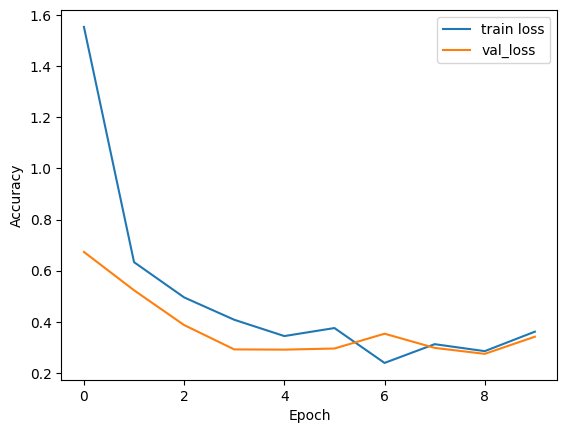

<Figure size 640x480 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt

#plot the loss
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.savefig('D:\\Uvindya\\personal\\DS\\FaceMask\\LossVal_loss.png')




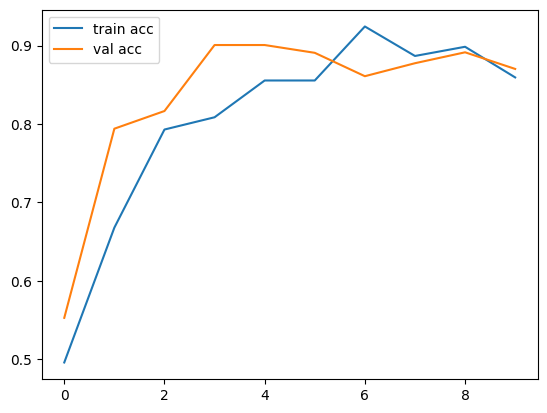

<Figure size 640x480 with 0 Axes>

In [29]:
#plot the accuracy
plt.plot(history.history['accuracy'],label='train acc')
plt.plot(history.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('D:\\Uvindya\\personal\\DS\\FaceMask\\AccVal_acc.png')


In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to the input size of the model
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (since the model expects a batch)
    img_array /= 255.0  # Normalize to match the training preprocessing (rescaling)
    return img_array

img_path = "D:\\Uvindya\\personal\\DS\\FaceMask\\with_mask\\with_mask_9.jpg"  # Path to the new image
img_array = load_and_preprocess_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


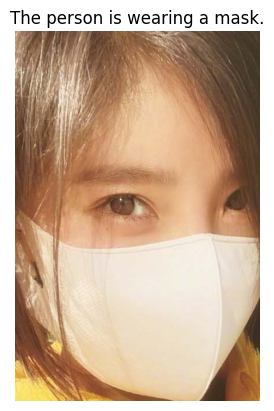

In [51]:
# Predict the class (assuming you have already trained your model)
prediction = model.predict(img_array)

# Display the image
plt.imshow(image.load_img(img_path))
plt.axis('off')  # Turn off axis for better visualization

# Show the prediction result
if prediction>0:
    plt.title("The person is wearing a mask.")
else:
    plt.title("The person is not wearing a mask.")

# Display the image and title
plt.show()

In [43]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize the image to the input size of the model
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension (since the model expects a batch)
    img_array /= 255.0  # Normalize to match the training preprocessing (rescaling)
    return img_array

img_path1 = "D:\\Uvindya\\personal\\DS\\FaceMask\\without_mask\\without_mask_59.jpg"  # Path to the new image
img_array = load_and_preprocess_image(img_path1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


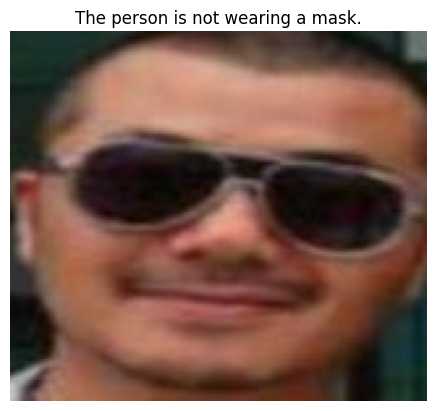

In [53]:
# Predict the class (assuming you have already trained your model)
prediction = model.predict(img_array)

# Display the image
plt.imshow(image.load_img(img_path1))
plt.axis('off')  # Turn off axis for better visualization

# Show the prediction result
if prediction==0:
    plt.title("The person is wearing a mask.")
else:
    plt.title("The person is not wearing a mask.")

# Display the image and title
plt.show()